In [1]:
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import networkx as nx
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [53]:
import kainit
import kamix
import kamol
import kaparam
import kareact
import kasig
import kasim
import kasystem
import kaheap
import kamatch
import kaviz
import kasnap
import kagraph
import kaplot

## kaviz and kagraph

In [ ]:
#kapparing = 'A(r[.] l[1]),A(r[1] l[2] m[7]),A(r[2] l[3]),A(r[3] l[4]),A(r[4] l[5] m[7]),A(r[5] l[6]),A(r[6] l[.])'
kapparing = 'A(r[6] l[1]),A(r[1] l[2]),A(r[2] l[3]),A(r[3] l[4]),A(r[4] l[5]),A(r[5] l[6])'
c = kamol.KappaComplex(kapparing)
print(c.show())
r = kaviz.Renderer(c)
r.render(node_size=200)

In [ ]:
data_dir='../KappaUtilities/TestData/'
mix = kasnap.SnapShot(data_dir + 'snap_large.ka')

In [ ]:
data_dir='../SiteSim/TestData/'
mix = kasnap.SnapShot(data_dir + 'snap__big.ka')

In [ ]:
data = mix.complexes[0].kappa_expression()

In [ ]:
mix.complexes[0].size

In [ ]:
c = kamol.KappaComplex(data)
r = kaviz.Renderer(c)
#r.render(node_size=10, labels='no')
r.render(node_size=150, legend=True)

In [ ]:
x1 = kamol.KappaComplex(data)

In [ ]:
x1.canonical

In [ ]:
kappa = kamol.Kappa()

In [ ]:
data2 = kappa.decode(x1.canonical, x1.system_views)

In [ ]:
c2 = kamol.KappaComplex(data2)
r2 = kaviz.Renderer(c2)
r2.render(node_size=150, legend=True)

In [ ]:
SGM = kamatch.SiteGraphMatcher()

In [ ]:
SGM.isomorphic(x1, c2)

In [ ]:
data = 'A(a1[1] a2[2] a3[3] c[8]), A(a1[1] a2[2] a3[3] c[4]) A(a1[5] a2[6] a3[7] c[4]), A(a1[5] a2[6] a3[7] c[8])'

In [ ]:
g1 = kamol.KappaComplex(data)
data_ = kappa.decode(g1.canonical, g1.system_views)
print(g1.canonical)
print(data_)
g2 = kamol.KappaComplex(data_)
print(SGM.isomorphic(g1, g2))

In [ ]:
data_dir='../SiteSim/TestData/'
mix = kasnap.SnapShot(data_dir + 'snap__1780.ka')

for m in mix.complexes:
    data = m.kappa_expression()
    g1 = kamol.KappaComplex(data, nav=True)
    g2 = kamol.KappaComplex(kappa.decode(g1.canonical, g1.system_views), nav=True)
    if not SGM.isomorphic(g1, g2):
        print("False")
        bad = m
        break
    else:
        print(f'size: {m.size} iso: True!')

In [ ]:
kappa_ring = 'A(r[6] l[1]),A(r[1] l[2]),A(r[2] l[3]),A(r[3] l[4]),A(r[4] l[5]),A(r[5] l[6])'
c = kamol.KappaComplex(kappa_ring)
print(c.show())
r = kaviz.Renderer(c)
r.render(node_size=200)
g = kagraph.KappaGraph(c)
cycle = g.get_cycle()
print(cycle)

In [ ]:
r.color_edge_lists(edge_list=[cycle[:-1]], line_width=1, edge_color='red')

In [ ]:
r.delete_edge_lists(edge_list=[cycle])

In [ ]:
r.render(node_size=200)

In [ ]:
data_dir='../KappaUtilities/TestData/'
snapaxapc5 = kasnap.SnapShot(data_dir + 'snap_large.ka')

c = {}
w = {}
for complx in snapaxapc5.complexes:
    g = kagraph.KappaGraph(complx)
    cycle = g.get_cycle()
    if cycle:
        if complx.size in c:
            c[complx.size] += complx.count
            w[complx.size].append(complx)
        else:
            c[complx.size] = complx.count
            w[complx.size] = [complx]
print(c)

##### rendering a complex (simple case)

In [ ]:
c21 = w[21][0]
r = kaviz.Renderer(c21)

In [ ]:
g21 = kagraph.KappaGraph(c21)

In [ ]:
nx.get_edge_attributes(g21.nxGraph,'bond')

In [ ]:
r.render()

In [ ]:
g21_cyc = g21.get_cycle()

In [ ]:
r.color_edge_lists(edge_list=g21_cyc, line_width=2, edge_color='red')

In [ ]:
center = nx.center(g21.nxGraph)
print(center)

In [ ]:
radius = nx.radius(g21.nxGraph)
print(radius)

In [ ]:
r.color_node_list(center, color='g', line_width=3)

##### A more complicated mixture and larger complex

In [ ]:
data_dir='../KappaUtilities/TestData/'
snapaxapc6 = kasnap.SnapShot(data_dir + 'snap__1784.ka')
snapaxapc6_df = pd.DataFrame(snapaxapc6.get_size_distribution(dictionary=True))
c = {}
w = {}
for complx in snapaxapc6.complexes:
    g = kagraph.KappaGraph(complx)
    cycle = g.get_cycle()
    if cycle:
        if complx.size in c:
            c[complx.size] += complx.count
            w[complx.size].append(complx)
        else:
            c[complx.size] = complx.count
            w[complx.size] = [complx]
print(c)

In [ ]:
c = w[310][0]

In [ ]:
r2 = kaviz.Renderer(c)

In [ ]:
r2.render(node_size=15, line_width=0.5, edge_color='gray', labels='')

##### the delete methods of Renderer do not modify the underlying graph but only its display

In [ ]:
basis, n = r2.graph.get_cycle_basis()

In [ ]:
r2.color_edge_lists(edge_list=basis[1], line_width=2, edge_color='yellow')

In [ ]:
r2.delete_edge_lists(edge_list=basis[1])

In [ ]:
# restore
r2.render(node_size=10, line_width=0.5, edge_color='gray', labels='')

In [ ]:
r2.color_edge_lists(edge_list=basis, line_width=0.5, edge_color='yellow')

In [ ]:
center = nx.center(r2.nx_graph)

In [ ]:
r2.color_node_list(node_list=center, color='yellow', line_width=5)

In [ ]:
r2.delete_node_list(node_list=center)

To modify the networkx-graph representation of the complex act through nxGraph.

In [ ]:
r2.graph.delete_node_list(node_list=center)

Make a copy of the renderer of the original graph (to preserve display settings like type-coloring). This will also get you a new figure object to play with.

In [ ]:
r2.layout()

In [ ]:
r2.render(node_size=10, line_width=0.5, edge_color='gray', labels='')

## kaplot

In [16]:
file = '../SiteSim/TestOutput/output.csv'
df = pd.read_csv(file)

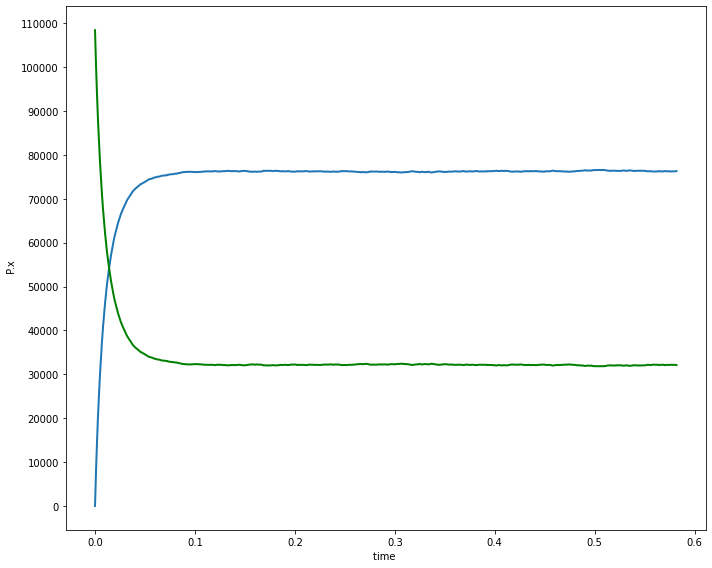

In [54]:
p1 = kaplot.XY_plot()
p1.add(df, xmajor=0.1, ymajor=10000, params={'linestyle': '-', 'linewidth': 2, 'marker': ',', 'markersize': 0.})
p1.add(df, x='time ', y=' P.x', xmajor=0.1, ymajor=10000, params={'linestyle': '-', 'color': 'g', 'linewidth': 2, 'marker': ',', 'markersize': 0.})

In [ ]:
# help(cmd.rename)
# cmd.rename(dir=data_dir, root='snap__')

snap1 = kasnap.SnapShot(data_dir + 'snap__98.ka')
sd_df1 = pd.DataFrame(snap1.get_size_distribution(dictionary=True))

snap2 = kasnap.SnapShot(data_dir + 'snap__90.ka')
sd_df2 = pd.DataFrame(snap2.get_size_distribution(dictionary=True))

snap3 = kasnap.SnapShot(data_dir + 'snap__20.ka')
sd_df3 = pd.DataFrame(snap3.get_size_distribution(dictionary=True))

p1 = kaplot.XY_plot()
p1.add(sd_df1, xmajor=2, ymajor=2000, params={'linestyle': '-', 'label': 'snap98', 'color': 'g', 'markerfacecolor': 'y'})
p1.add(sd_df2, xmajor=2, ymajor=2000, params={'linestyle': '-', 'label': 'snap90', 'color': 'g', 'markerfacecolor': 'g'})
p1.add(sd_df3, xmajor=2, ymajor=2000, params={'linestyle': '-', 'label': 'snap20', 'color': 'b', 'markerfacecolor': 'b'})
p1.ax.legend()
kaplot.show()